In [6]:
%pylab inline
from scipy.misc import factorial

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


Populating the interactive namespace from numpy and matplotlib


In [7]:
# 0

a = arange(100)+1
b = arange(50)*2+1
c = arange(-pi, pi, 0.01*pi)
d = clip(sin(arange(100)+1), 0, 1)
A = a.reshape((10,10))
B = zeros((100,100)) + diag(a) + diag(a[98::-1], 1) + diag(a[98::-1], -1)
C = tril(ones((100, 100)),0).T
D = vstack((cumsum(arange(100)), factorial(arange(100)))).T
E = array([[(sign(i % j)+1)%2 for i in arange(100)+1] for j in arange(100)+1])

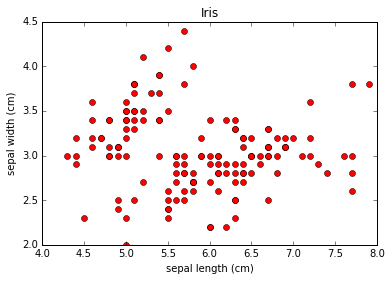

In [76]:
# 1
from sklearn import datasets 
iris = datasets.load_iris() 

p = plot(iris.data[:,0], iris.data[:,1], 'ro')
xlabel('sepal length (cm)')
ylabel('sepal width (cm)')
title('Iris')

([<matplotlib.axis.XTick at 0x7fb2701ad6d0>,
 <a list of 7 Text xticklabel objects>)

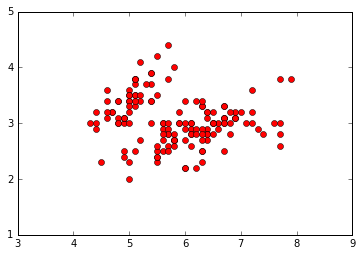

In [77]:
plot(iris.data[:,0], iris.data[:,1], 'ro')
xlim(3,9)
ylim(1,5)
yscale('linear')

yticks( arange(5)+1)
xticks( arange(7)+3)

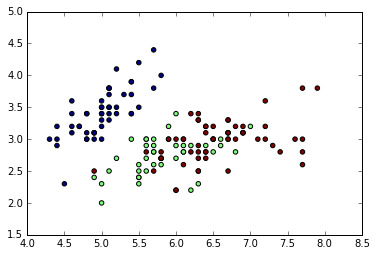

In [10]:
scatter(iris.data[:,0], iris.data[:,1], c=iris.target )
savefig('zadanie1.png')

In [11]:
iris.target
savefig('zadanie1.png')

In [56]:
#2
def line(a, b, x):
    sx = (max(x) - min(x))*0.1
    x = append([min(x)-sx], append(x, [max(x)+sx]))
    y = a*x + b
    sy = (max(y) - min(y))*0.1
    plot(x, y)
    xlim(min(x), max(x))
    ylim(min(y)-sy, max(y)+sy)

def pl(a, b, data):
    x = data[:,0]
    y = data[:,1]
    print x.shape, y.shape
    scatter(x, y, c=array(['g', 'r'])[(a*x+b>y)+0] )
    line (a, b, array([min(x), max(x)]))
def dist(a, b, p):
    return abs(a*p[0]-p[1]+b)/sqrt(a + 1)
def polygon(K, b):
    fi = 2*pi/K
    d = b/(2*sin(fi))
    pts = array([[cos(i*fi)*d, sin(i*fi)*d] for i in arange(K)])
    return pts
def genData(K, b, num=1000):
    cen = polygon(K, b)
    points = array([])
    return[array([random.normal(c[0], 1, num), random.normal(c[1], 1, num)]).T for c in cen]
def center(b):
    return [(max(b[:,0])+min(b[:,0]))/2,(max(b[:,1])+min(b[:,1]))/2]
def pointsDist(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
def filtr(p1, p2, centers):
    dist = pointsDist(p1, p2)
    for p2 in centers:
        if dist > pointsDist(p1, p2):
            return False
    return True

(100,) (100,)


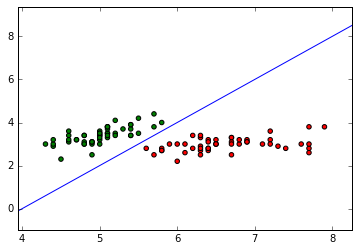

In [57]:
pl(2, -8, iris.data[iris.target != 1])
savefig('zadanie2a.png')

(100,) (100,)


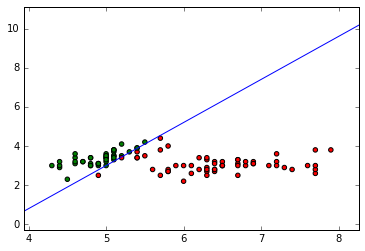

In [58]:
pl(2.2, -8, iris.data[iris.target != 1])
savefig('zadanie2b.png')

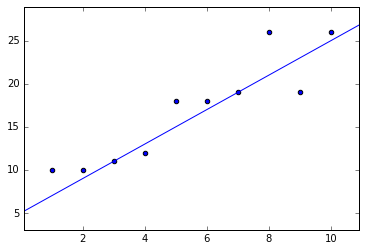

In [59]:
#3
a = vstack((arange(10)+1, array([10, 10, 11, 12,18, 18, 19, 26, 19, 26]))).T
scatter(a[:,0], a[:, 1])
line(2, 5, a[0])
savefig('zadanie3a.png')

10.9696551146 9.81495457622


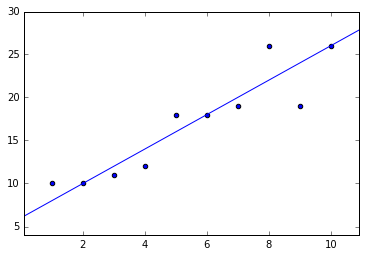

In [60]:
d = [dist(2, 5, p) for p in  a]
print sum(d), sum([dist(2, 6, p) for p in  a])
scatter(a[:,0], a[:, 1])
line(2, 6, a[0])
savefig('zadanie3a.png')

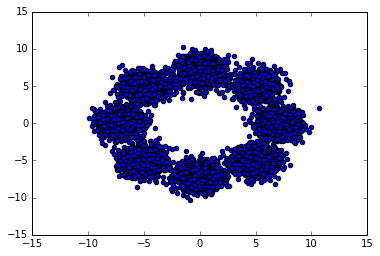

In [71]:
gD = genData(8, 10)
centers = array([center(b) for b in gD])

for data in gD:
    scatter(data[:,0], data[:, 1])

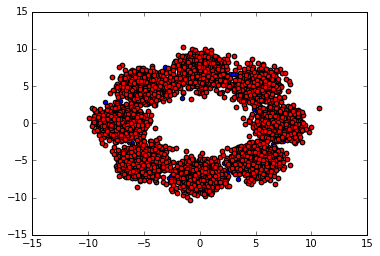

In [72]:
#5
for data in gD:
    scatter(data[:,0], data[:, 1])
for data, middle in zip(gD, centers):
    f = array(filter(lambda p1: filtr(p1, middle, centers), data))
    scatter(f[:,0], f[:,1], c='r')
    

In [17]:
x = arange(10)

filter((lambda x: x >2 ), (x))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])